## Linear Regression

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split,validation_curve,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [12]:
df = pd.read_csv('data/dataset.csv')
df = df[df['genre'].notnull()]
df=df.drop(['track','artist','uri'],axis=1)
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,0.511,0.603,2,-7.637,1,0.0280,0.0385,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,0.520,0.411,9,-12.411,1,0.0315,0.7860,0.001200,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,0.746,0.666,2,-10.408,1,0.1460,0.5430,0.000000,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


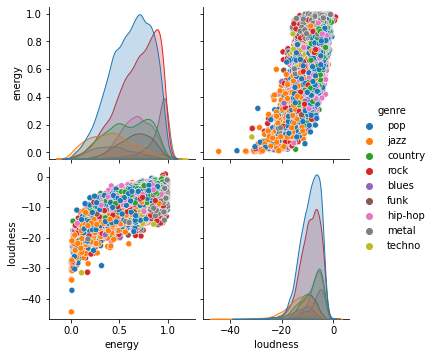

In [18]:
sns.pairplot(df[['energy','loudness','genre']],hue='genre')

<AxesSubplot:>

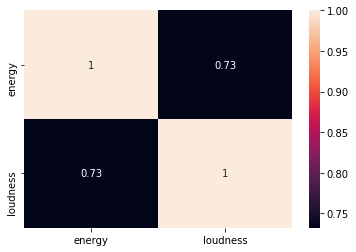

In [22]:
sns.heatmap(df[['energy','loudness']].corr(),annot=True)

In [35]:
X=df[['energy']]
y=df['loudness']

In [40]:
def fit_summary(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print(f'Coefficients W: {model.coef_}')
    print(f'Intercept W0: {model.intercept_}')
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse}')

    #plt.figure()
    #plt.plot(np.arange(len(model.coef_)), model.coef_, ".",  markersize=15, color = "darkgreen")
    #plt.xlabel("Feature number")
    #plt.ylabel("Coefficients w")
    #plt.title("Coefficient Weights")
    #plt.show()
    return mse

In [44]:
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residual = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residual)
    plt.axhline(0, c='black', linestyle=':')
    plt.title('Residuals')
    for x_predict, y_residual in zip(y_pred, residual):
        plt.plot([x_predict, x_predict], [0, y_residual], c='red', lw=1, alpha=0.8)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [46]:
lm=LinearRegression()
fit_summary(lm,X_train,X_test,y_train,y_test)

Coefficients W: [13.44093808]
Intercept W0: -17.586497277451613
MSE: 7.759965453975914


7.759965453975914

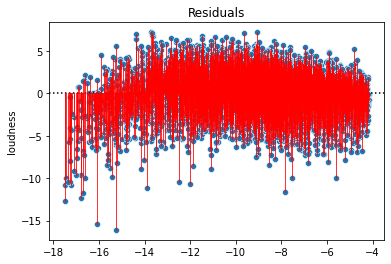

In [48]:
plot_residuals(lm,X_test,y_test)

In [67]:
poly=PolynomialFeatures(2,include_bias=False)
x_np=np.array(X)
x_np

array([[0.505],
       [0.272],
       [0.603],
       ...,
       [0.807],
       [0.804],
       [0.177]])

In [73]:
poly.fit_transform(x_np)

array([[0.505   , 0.255025],
       [0.272   , 0.073984],
       [0.603   , 0.363609],
       ...,
       [0.807   , 0.651249],
       [0.804   , 0.646416],
       [0.177   , 0.031329]])

In [130]:
poly_model=make_pipeline(PolynomialFeatures(8),LinearRegression())
poly_model.fit(x_np,y)

xfit=np.linspace(min(x_np),max(x_np),1000)
yfit=poly_model.predict(xfit)

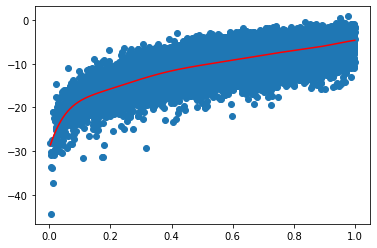

In [131]:
plt.scatter(x_np,y)
plt.plot(xfit,yfit,color="red")

## Lasso regression

In [94]:
def plot_validation_curve(estimator, x, y, *, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator, x, y, param_name=param_name, param_range=param_range, cv=cv
    )
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    plt.title('Validation Curve')
    plt.xlabel('alpha')
    plt.ylabel('Score')
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label='Training score',
                 color='darkorange', lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color='darkorange', lw=lw)
    plt.plot(param_range, test_scores_mean, label='Test score',
                 color='navy', lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color='navy', lw=lw)
    plt.xticks(param_range)
    plt.legend(loc='best')

In [102]:
ls=Lasso(alpha=0.0001)
fit_summary(ls,X_train,X_test,y_train,y_test)

Coefficients W: [13.4389066]
Intercept W0: -17.585201637200598
MSE: 7.76003183362129


7.76003183362129

In [103]:
cls=GridSearchCV(ls,[{'alpha':np.logspace(-4,-0.5,30)}],cv=20,refit=False)
cls.fit(X,y)
print(f'Perfect alpha ',cls.best_params_)

Perfect alpha  {'alpha': 0.0001}


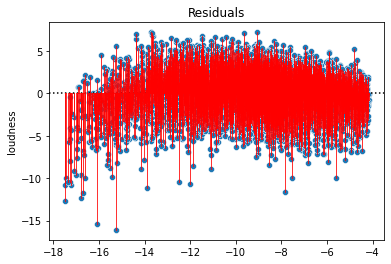

In [104]:
plot_residuals(ls,X_test,y_test)

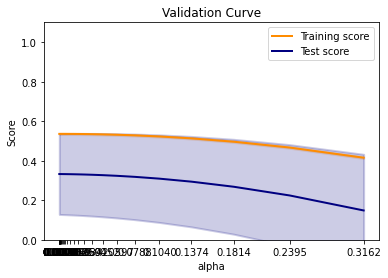

In [106]:
plot_validation_curve(
    Lasso(),
    X,
    y,
    param_name='alpha',
    param_range=np.logspace(-4,-0.5,30),
    cv=20
)

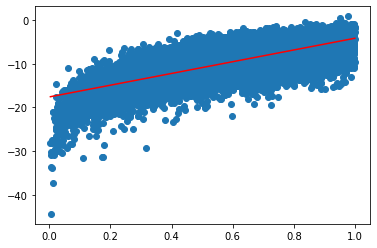

In [111]:
y_fit=ls.predict(xfit)
plt.scatter(x_np,y)
plt.plot(xfit,y_fit,color="red")

c:\users\tomislav\anaconda3\envs\podatocno_rudarstvo\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50407.73141920011, tolerance: 34.18120297024992
  model = cd_fast.enet_coordinate_descent(


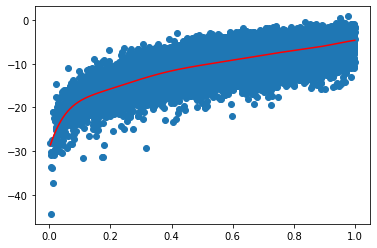

In [132]:
poly_model_ls=make_pipeline(PolynomialFeatures(8),Lasso(alpha=0.0001))
poly_model_ls.fit(x_np,y)
yfit=poly_model.predict(xfit)
plt.scatter(x_np,y)
plt.plot(xfit,yfit,color='red')

## Ridge regression


In [134]:
rg=Ridge(0.0001)
fit_summary(rg,X_train,X_test,y_train,y_test)

Coefficients W: [13.44093628]
Intercept W0: -17.58649613400987
MSE: 7.759965512377281


7.759965512377281

In [135]:
cls=GridSearchCV(rg,[{'alpha':np.logspace(-4,-0.5,30)}],cv=20,refit=False)
cls.fit(X,y)
print(f'Perfect alpha ',cls.best_params_)


Perfect alpha  {'alpha': 0.0001}


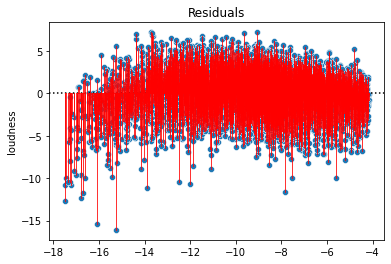

In [136]:
plot_residuals(ls,X_test,y_test)


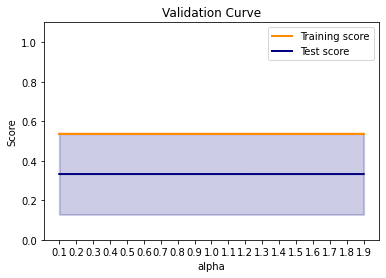

In [139]:
plot_validation_curve(
    Ridge(),
    X,
    y,
    param_name='alpha',
    param_range=[i/10 for i in range(1,20)],
    cv=20
)

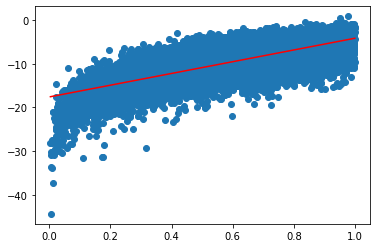

In [141]:
y_fit=rg.predict(xfit)
plt.scatter(x_np,y)
plt.plot(xfit,y_fit,color="red")

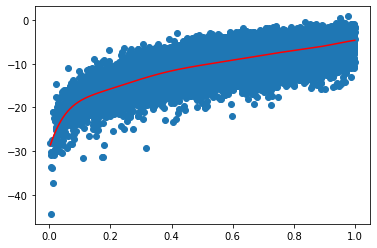

In [140]:
poly_model_rg=make_pipeline(PolynomialFeatures(8),Ridge(alpha=0.0001))
poly_model_rg.fit(x_np,y)
yfit=poly_model.predict(xfit)
plt.scatter(x_np,y)
plt.plot(xfit,yfit,color='red')
